<a href="https://colab.research.google.com/github/GreatlyHizkia/students-academic-performance/blob/main/Predict%20Exam%20Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load DataSet**

In [118]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline


source data: https://www.kaggle.com/datasets/emanfatima2025/student-academic-performance-trends

In [119]:
# Load Data
df = pd.read_csv('/content/student_exam_scores.csv')

In [120]:
# check first 5 rows
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [121]:
# check last 5 rows
df.tail()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0
199,S200,10.2,6.3,97.4,68,37.8


In [122]:
# Check rows and columns
df.shape
print(f"this dataset contains {df.shape[0]} rows")
print(f"this dataset contains {df.shape[1]} columns")

this dataset contains 200 rows
this dataset contains 6 columns


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


## **Data PreProcessing**

In [124]:
# Check null values
df.isnull().sum()

,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


Since in our dataset there is no null values, and i think the dataset already cleaned, so i just continue to EDA

## **Exploratory Data Analysis**

In [125]:
# Descriptive Analysis
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


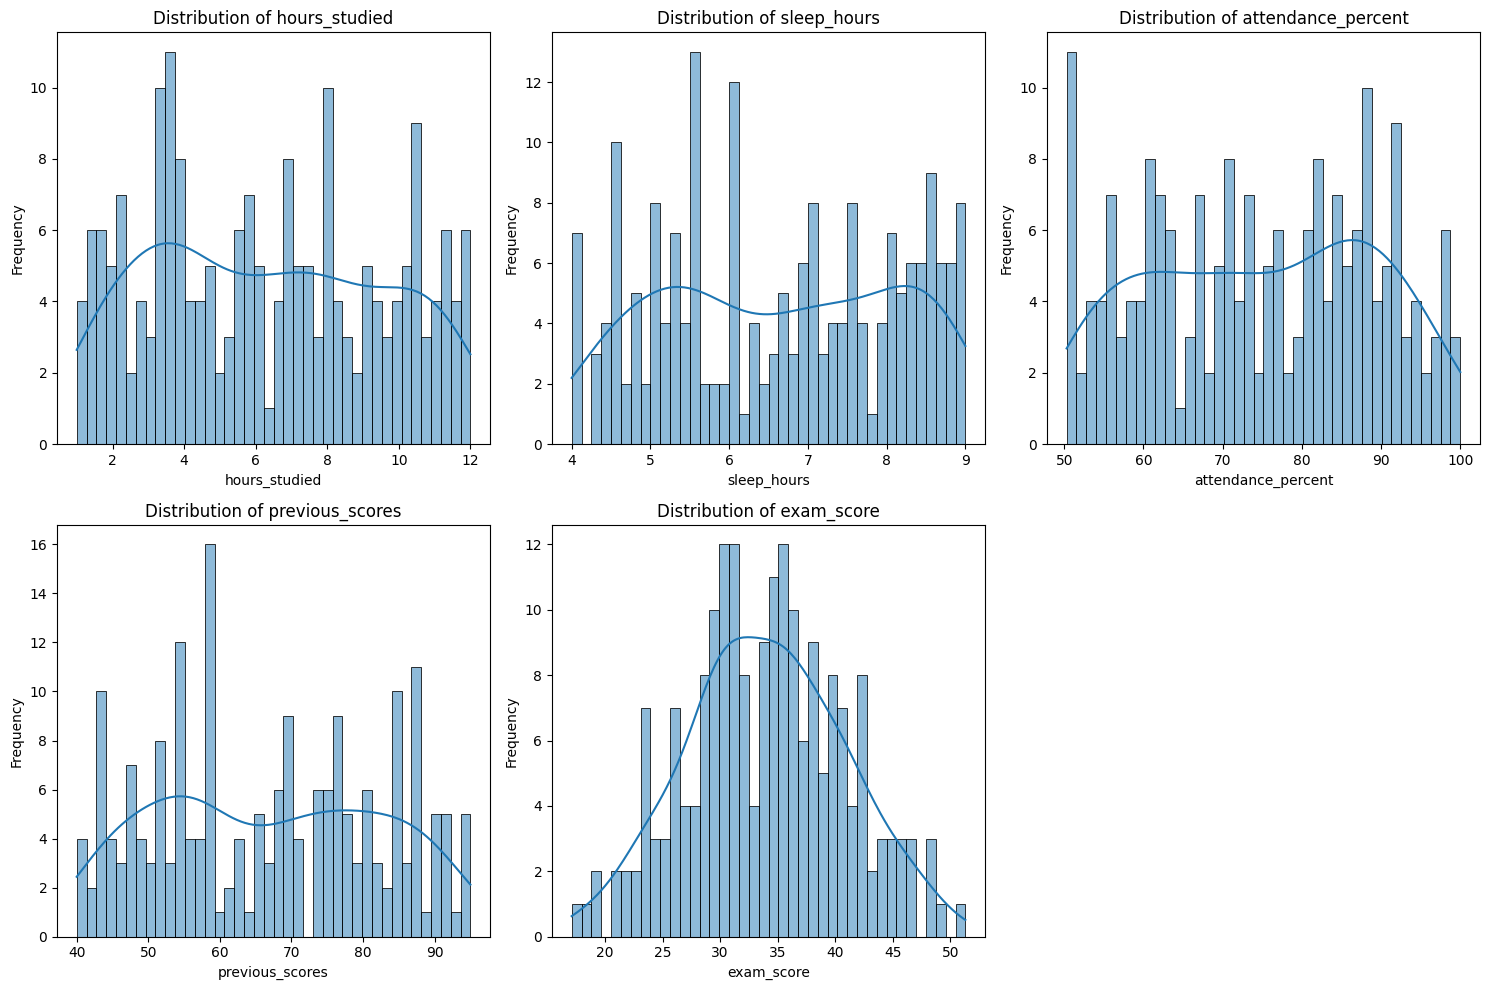

In [126]:
# Check distribution
numerical_cols = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']

plt.figure(figsize=(15, 10)) # Adjust the overall figure size

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Create subplots (2 rows, 3 columns)
    sns.histplot(data=df, x=col, kde=True, bins=40) # Added bins parameter
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

From the distribution chart above, we can see that none of the students' exam scores exceed 60, unlike in the previous scores, where many students scored above 60.

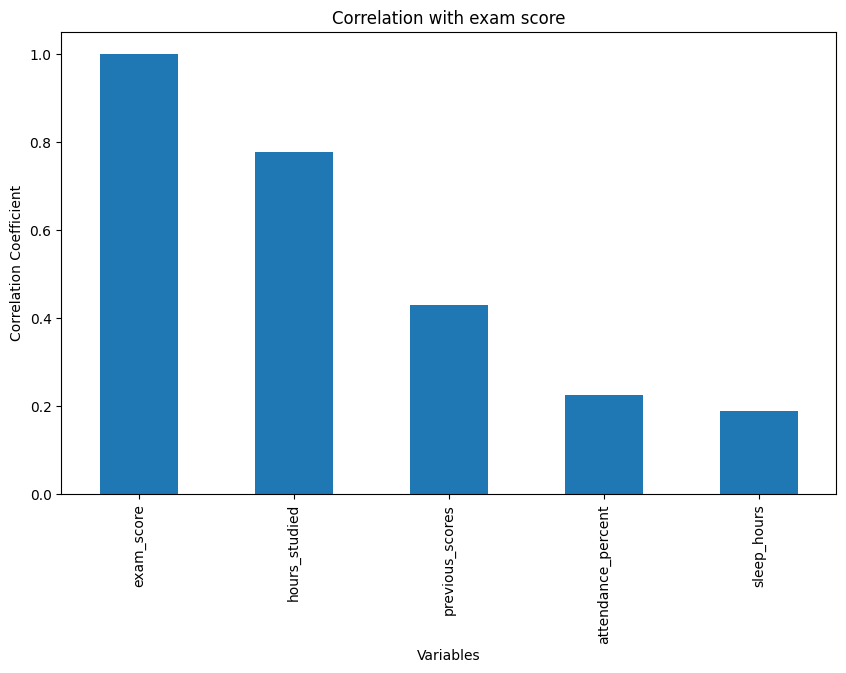

In [127]:
# Check the correlation column "exam_score" with other columns
target_corr = df.drop('student_id', axis=1).corr()['exam_score']

# sorted
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with exam score')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

from chart above we can see that 'exam_score' highly correlated with column 'hours_studied'

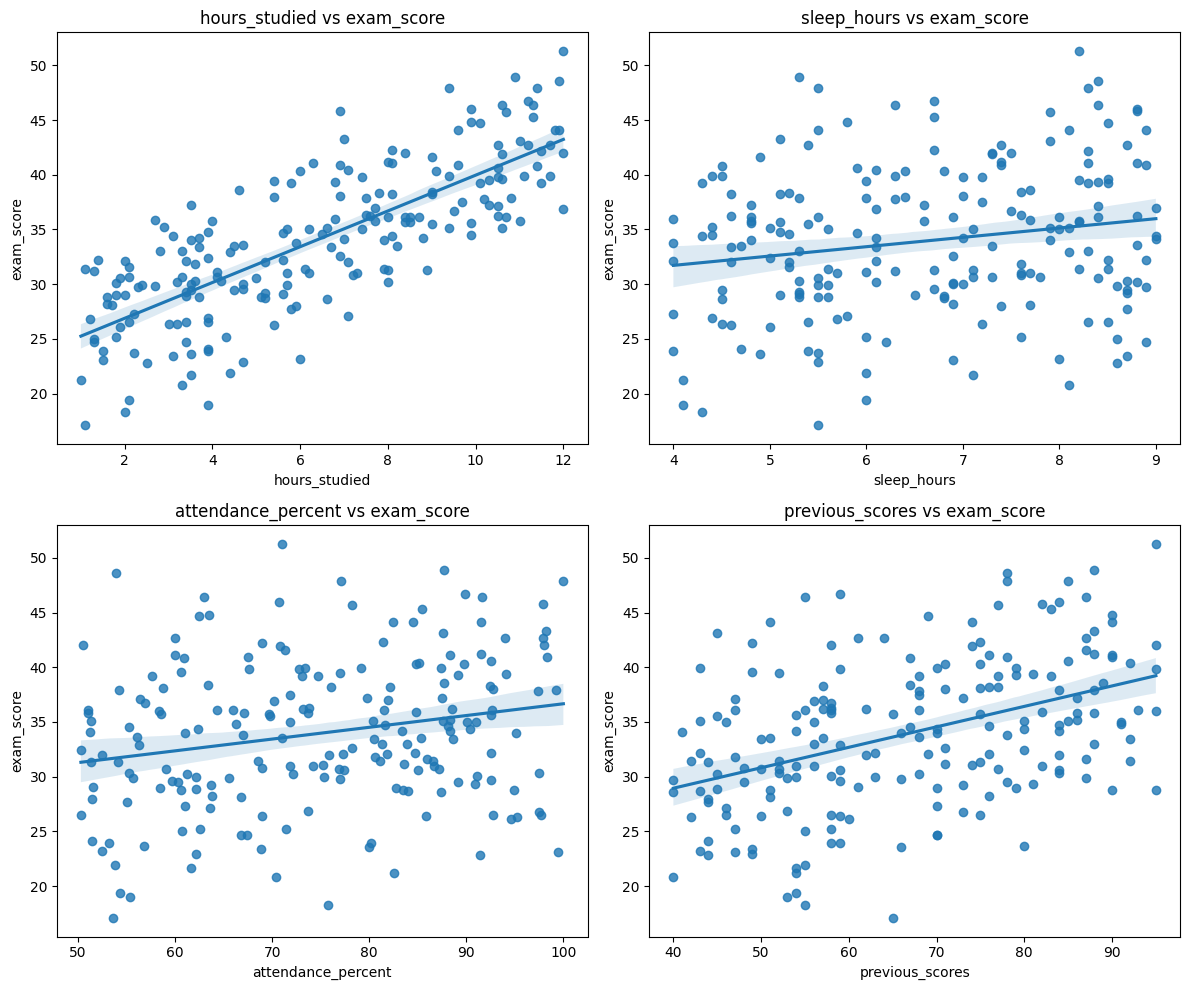

In [128]:
feature_cols = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
target_col = 'exam_score'

plt.figure(figsize=(12, 10))

for i, col in enumerate(feature_cols):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=col, y=target_col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)

plt.tight_layout()
plt.show()

## **Train Model 1**

### Regression Model

In [129]:
# Determine the target variable and features
X = df.drop(columns=['student_id', 'exam_score'])
y = df['exam_score']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (160, 4)
X_test shape: (40, 4)


In [131]:
# Train regression Linier Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [132]:
# Value of the intercept and coefficients
print(reg.intercept_)
print(reg.coef_)

-2.204963905836877
[1.54934126 0.88415643 0.10894946 0.18303355]


In [133]:
#training score
reg.score(X_train, y_train)

0.83642950148381

**Model Evaluation**

In [134]:
# Predict model
y_pred = reg.predict(X_test)

Evaluate the Linear Regression model's performance using MAE, MSE, and R-squared.

In [135]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

data = {
    'MAE': [mae_lr],
    'MSE': [mse_lr],
    'R2': [r2_lr]
}

# Convert to dataframe
evaluation_lr = pd.DataFrame(data, index=['Linear Regression'])

print(evaluation_lr)



                        MAE       MSE        R2
Linear Regression  2.310858  7.761783  0.853745


In [136]:
# Comparison between actual value and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df)

,Actual,Predicted
95,28.7,28.886072
15,34.1,29.680421
30,34.5,35.311956
158,29.5,31.180448
128,36.1,39.448943
115,46.4,41.691583
69,23.9,23.969183
170,45.3,45.722509
174,44.8,41.652932
45,31.8,27.476157


## **Train Model 2**

### Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_reg = RandomForestRegressor(random_state=42)

In [138]:
# Train the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [139]:
# Predict the model
y_pred_rf = rf_reg.predict(X_test)

**Model Evaluation**

Evaluate the Random Forest model's performance using MAE, MSE, and R-squared and compare with the Linear Regression model.



In [140]:
# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create a DataFrame for Random Forest evaluation metrics
data_rf = {
    'MAE': [mae_rf],
    'MSE': [mse_rf],
    'R2': [r2_rf] }

evaluation_rf_df = pd.DataFrame(data_rf, index=['Random Forest Regression'])

# Concatenate the evaluation DataFrames
combined_evaluation_df = pd.concat([evaluation_lr, evaluation_rf_df])

# Print the combined DataFrame
display(combined_evaluation_df)

,MAE,MSE,R2
Linear Regression,2.310858,7.761783,0.853745
Random Forest Regression,2.969800,11.026394,0.792230


In [142]:
# Comparison between actual value and predicted value for Random Forest
comparison_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
display(comparison_rf_df)

,Actual,Predicted
95,28.7,28.588
15,34.1,29.050
30,34.5,38.214
158,29.5,33.156
128,36.1,39.361
115,46.4,41.852
69,23.9,22.494
170,45.3,46.005
174,44.8,42.255
45,31.8,26.740


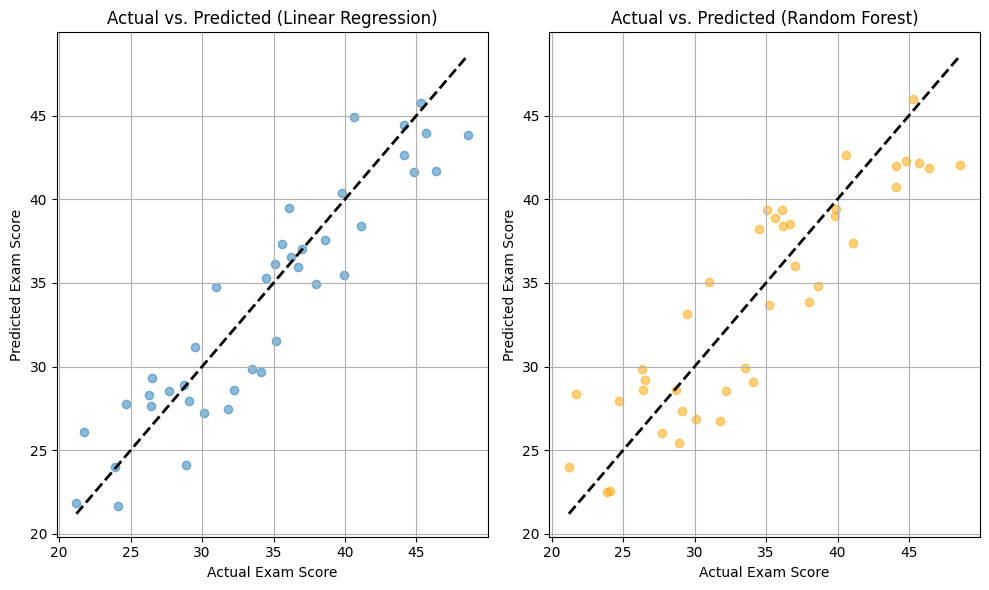

In [146]:
plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.grid(True)

# Scatter plot for Random Forest Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted (Random Forest)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

*   The evaluation metrics for the Random Forest Regression model are: MAE of 2.969800, MSE of 11.026394, and R2 of 0.792230.
*   Comparing the models, Linear Regression (MAE: 2.310858, MSE: 7.761783, R2: 0.853745) performed better than Random Forest Regression on this dataset, with lower MAE and MSE, and a higher R2 score.

### Insights

*   Linear Regression appears to be a more suitable model for this dataset based on the evaluation metrics and plot above.

